Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [28]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [29]:
# !ls drive/MyDrive/Colab\ Notebooks/CNN_assignment

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [30]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Train")
data_dir_test = pathlib.Path('Test')

In [31]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2238
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [32]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [33]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6738 files belonging to 9 classes.
Using 5391 files for training.


In [34]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6738 files belonging to 9 classes.
Using 1347 files for validation.


In [35]:
#rm -rf  Train/.ipynb_checkpoints/

In [36]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


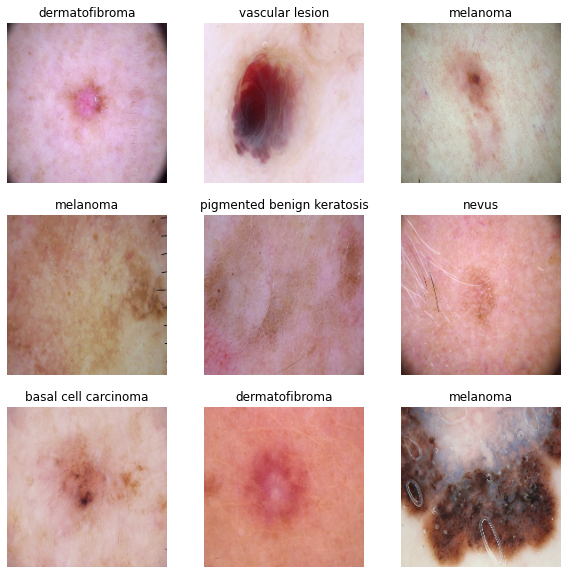

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [38]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [39]:
### Your code goes here


In [40]:

num_classes = 9

# model = Sequential([
#   layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])



### Compile the model
Choose an appropirate optimiser and loss function for model training

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [42]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 128)       147584    
                                                      

### Train the model

In [43]:

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


2025-03-26 16:43:06.258562: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:380] Filling up shuffle buffer (this may take a while): 158 of 1000


  2/169 [..............................] - ETA: 12s - loss: 3.3675 - accuracy: 0.0938  

2025-03-26 16:43:06.531283: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:405] Shuffle buffer filled.


169/169 [==============================] - 27s 94ms/step - loss: 1.6653 - accuracy: 0.3919 - val_loss: 8.0980 - val_accuracy: 0.1269
Epoch 2/20
169/169 [==============================] - 15s 86ms/step - loss: 1.4720 - accuracy: 0.4693 - val_loss: 8.3662 - val_accuracy: 0.1359
Epoch 3/20
169/169 [==============================] - 14s 81ms/step - loss: 1.3458 - accuracy: 0.5166 - val_loss: 8.4977 - val_accuracy: 0.1477
Epoch 4/20
169/169 [==============================] - 13s 80ms/step - loss: 1.2952 - accuracy: 0.5368 - val_loss: 2.7076 - val_accuracy: 0.3786
Epoch 5/20
169/169 [==============================] - 13s 79ms/step - loss: 1.2468 - accuracy: 0.5619 - val_loss: 3.7874 - val_accuracy: 0.3029
Epoch 6/20
169/169 [==============================] - 13s 78ms/step - loss: 1.1588 - accuracy: 0.5869 - val_loss: 6.3196 - val_accuracy: 0.1329
Epoch 7/20
169/169 [==============================] - 13s 78ms/step - loss: 1.1200 - accuracy: 0.6071 - val_loss: 5.1248 - val_accuracy: 0.1685
Epo

### Visualizing training results

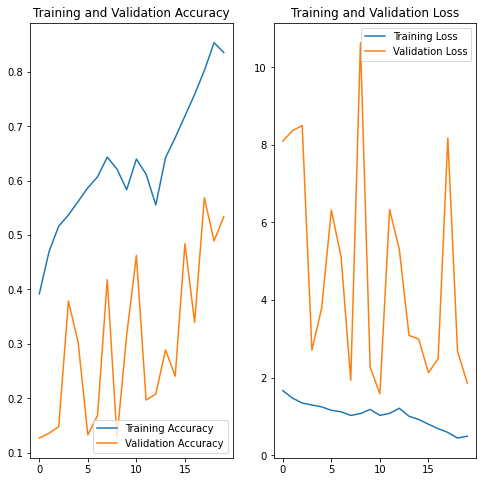

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [45]:
# From the training and validation accuracy/loss plots, we can observe that the validation accuracy is significantly
#lower than the training accuracy, and the validation loss is higher than the training loss.
# This indicates that the model is overfitting to the training data, as it is performing well on the training data but poorly on
#the unseen validation data.


# Your code goes here
# Data Augmentation implementation using Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),  # Equivalent to width_shift_range & height_shift_range
    layers.RandomContrast(0.2),
    layers.Normalization()  # Optional: Standardization
])

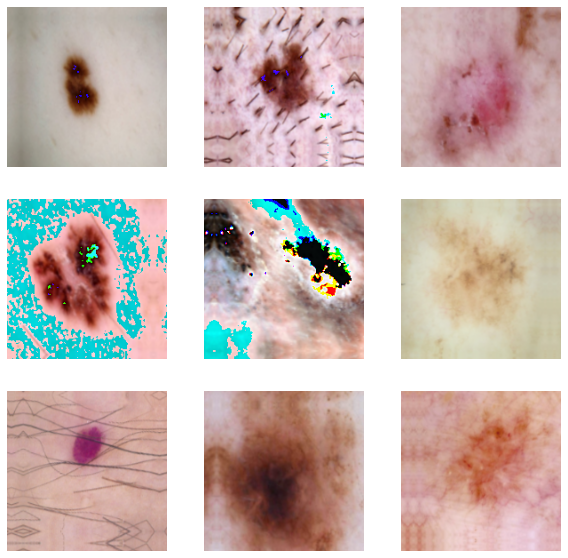

In [46]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    # Expand dimensions to add a batch dimension
    augmented_image = data_augmentation(tf.expand_dims(images[i], 0))
    # Remove the batch dimension for display
    augmented_image = tf.squeeze(augmented_image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image.numpy().astype("uint8"))
    plt.axis("off")
plt.show()

### Todo:
### Create the model, compile and train the model


In [47]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

num_classes = 9

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),

    layers.Conv2D(64, (2,2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (2,2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (2,2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (2,2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])


### Compiling the model

In [48]:
# ### Compile the model
# Choose an appropirate optimiser and loss function for model training
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       7         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 64)      832       
                                                                 
 batch_normalization_7 (Batc  (None, 180, 180, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 180, 180, 64)      16448     
                                                                 
 batch_normalization_8 (Batc  (None, 180, 180, 64)     256       
 hNormalization)                                      

### Training the model

In [50]:
## Your code goes here, note: train your model for 20 epochs
# View the summary of all layers
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 18s 97ms/step - loss: 1.8502 - accuracy: 0.3682 - val_loss: 292.4531 - val_accuracy: 0.1641
Epoch 2/20
169/169 [==============================] - 15s 89ms/step - loss: 1.6034 - accuracy: 0.4224 - val_loss: 201.8715 - val_accuracy: 0.1054
Epoch 3/20
169/169 [==============================] - 16s 93ms/step - loss: 1.5085 - accuracy: 0.4352 - val_loss: 72.0624 - val_accuracy: 0.1700
Epoch 4/20
169/169 [==============================] - 16s 96ms/step - loss: 1.5989 - accuracy: 0.4188 - val_loss: 1.7696 - val_accuracy: 0.3935
Epoch 5/20
169/169 [==============================] - 16s 98ms/step - loss: 1.4838 - accuracy: 0.4463 - val_loss: 2.3586 - val_accuracy: 0.3296
Epoch 6/20
169/169 [==============================] - 17s 99ms/step - loss: 1.4276 - accuracy: 0.4673 - val_loss: 2.4089 - val_accuracy: 0.2621
Epoch 7/20
169/169 [==============================] - 16s 96ms/step - loss: 1.4206 - accuracy: 0.4686 - val_loss: 7.6436 - val_accu

### Visualizing the results

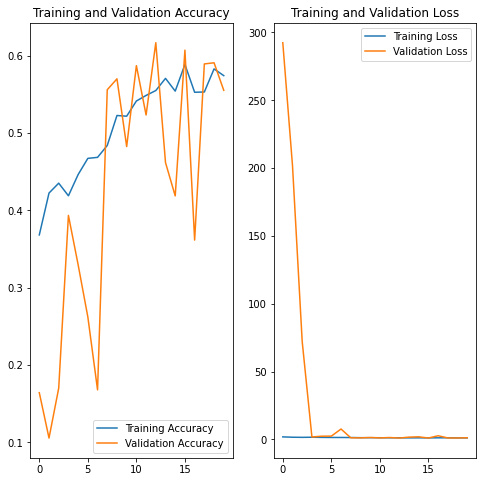

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [52]:

from collections import Counter

# Get the labels for all images in the training dataset
labels = []
for _, label_batch in train_ds:
  labels.extend(label_batch.numpy().tolist())

# Count the number of samples for each class
class_counts = Counter(labels)

# Find the class with the least number of samples
least_samples_class = min(class_counts, key=class_counts.get)
least_samples_count = class_counts[least_samples_class]

# Find the classes that dominate the data
total_samples = sum(class_counts.values())
dominant_classes = []
for class_label, count in class_counts.items():
  if count / total_samples > 0.15:  # Consider classes with >15% proportion as dominant
    dominant_classes.append(class_label)

print("Class with the least number of samples:", class_names[least_samples_class], "with", least_samples_count, "samples.")
print("Classes that dominate the data:", [class_names[label] for label in dominant_classes])


Class with the least number of samples: dermatofibroma with 454 samples.
Classes that dominate the data: []


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [53]:
!pip install Augmentor -q

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [54]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [66]:
# import shutil
# for class_name in class_names:
#   # Remove the Train/{class_name}/output/ directory
#   output_dir = f'Train/{class_name}/output/'
#   if os.path.exists(output_dir):
#       shutil.rmtree(output_dir)

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [62]:
path_to_training_dataset="Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset, i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 614 image(s) found.
Output directory set to Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEE70552C10>: 100%|██████████| 500/500 [00:02<00:00, 190.16 Samples/s]                  


Initialised with 875 image(s) found.
Output directory set to Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEE6FF8EB50>: 100%|██████████| 500/500 [00:02<00:00, 180.48 Samples/s]                  


Initialised with 595 image(s) found.
Output directory set to Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FEE702967C0>: 100%|██████████| 500/500 [00:02<00:00, 204.77 Samples/s]


Initialised with 938 image(s) found.
Output directory set to Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FEE70188C10>: 100%|██████████| 500/500 [00:14<00:00, 34.65 Samples/s]                    


Initialised with 857 image(s) found.
Output directory set to Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7FEE70279970>: 100%|██████████| 500/500 [00:13<00:00, 38.30 Samples/s]                   


Initialised with 962 image(s) found.
Output directory set to Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEE6FE61190>: 100%|██████████| 500/500 [00:02<00:00, 187.49 Samples/s]                  


Initialised with 577 image(s) found.
Output directory set to Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FEE704EA550>: 100%|██████████| 500/500 [00:05<00:00, 85.18 Samples/s] 


Initialised with 681 image(s) found.
Output directory set to Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEE700EA2B0>: 100%|██████████| 500/500 [00:02<00:00, 192.61 Samples/s]                  


Initialised with 639 image(s) found.
Output directory set to Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEE70356760>: 100%|██████████| 500/500 [00:02<00:00, 194.38 Samples/s]                  


In [68]:
!ls 'Train/actinic keratosis/' |wc -l

614


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

In [82]:
org_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

org_label = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

original_dict = dict(zip(org_list, org_label))

original_df = pd.DataFrame(list(original_dict.items()),columns = ['Path','Label'])

### Lets see the distribution of augmented data after adding new images to the original training data.

In [83]:
from glob import glob
import os

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[-10:]

['/content/drive/My Drive/Colab Notebooks/CNN_assignment/Train/vascular lesion/output/vascular lesion_original_ISIC_0026349.jpg_a3c56578-d78e-40f4-9a51-11c1349376b6.jpg',
 '/content/drive/My Drive/Colab Notebooks/CNN_assignment/Train/vascular lesion/output/vascular lesion_original_ISIC_0025873.jpg_c0306e20-8a63-4ccf-ac4d-7717b1137be6.jpg',
 '/content/drive/My Drive/Colab Notebooks/CNN_assignment/Train/vascular lesion/output/vascular lesion_original_ISIC_0026068.jpg_2ff79369-7b33-471b-92cf-32b34b05b411.jpg',
 '/content/drive/My Drive/Colab Notebooks/CNN_assignment/Train/vascular lesion/output/vascular lesion_original_ISIC_0029099.jpg_faf500c4-4498-494c-b8a5-39e9f1bf01ac.jpg',
 '/content/drive/My Drive/Colab Notebooks/CNN_assignment/Train/vascular lesion/output/vascular lesion_original_ISIC_0034196.jpg_fb8fce3f-129b-4311-bf7a-4db585a40732.jpg',
 '/content/drive/My Drive/Colab Notebooks/CNN_assignment/Train/vascular lesion/output/vascular lesion_original_ISIC_0031201.jpg_df47185e-1d4c-418

In [84]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:10]

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis']

In [85]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
#dataframe_dict_new

In [87]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)
new_df.head()

,Path,Label
0,/content/drive/My Drive/Colab Notebooks/CNN_as...,seborrheic keratosis
1,/content/drive/My Drive/Colab Notebooks/CNN_as...,seborrheic keratosis
2,/content/drive/My Drive/Colab Notebooks/CNN_as...,seborrheic keratosis
3,/content/drive/My Drive/Colab Notebooks/CNN_as...,seborrheic keratosis
4,/content/drive/My Drive/Colab Notebooks/CNN_as...,seborrheic keratosis


In [88]:
new_df['Label'].value_counts()

,count
Label,
pigmented benign keratosis,962
melanoma,938
basal cell carcinoma,876
nevus,857
squamous cell carcinoma,681
vascular lesion,639
actinic keratosis,614
dermatofibroma,595
seborrheic keratosis,577


In [70]:
data_dir_train

PosixPath('Train')

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [88]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [89]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6738 files belonging to 9 classes.
Using 5391 files for training.


#### **Todo:** Create a validation dataset

In [90]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6738 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [91]:
num_classes = 9

model = Sequential([
#     data_augmentation,
    layers.Rescaling(1./255,input_shape=(img_height, img_width, 3)),

    layers.Conv2D(64, (2,2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (2,2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (2,2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (2,2), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [92]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 180, 180, 64)      832       
                                                                 
 batch_normalization_32 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 180, 180, 64)      16448     
                                                                 
 batch_normalization_33 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 90, 90, 64)     

#### **Todo:**  Train your model

In [ ]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
169/169 [==============================] - 20s 108ms/step - loss: 1.6933 - accuracy: 0.4383 - val_loss: 68.7076 - val_accuracy: 0.1321
Epoch 2/25
169/169 [==============================] - 18s 104ms/step - loss: 1.2431 - accuracy: 0.5687 - val_loss: 63.4936 - val_accuracy: 0.1173
Epoch 3/25
169/169 [==============================] - 18s 103ms/step - loss: 1.0412 - accuracy: 0.6372 - val_loss: 45.3884 - val_accuracy: 0.1990
Epoch 4/25
169/169 [==============================] - 18s 104ms/step - loss: 0.8777 - accuracy: 0.6884 - val_loss: 2.4826 - val_accuracy: 0.4922
Epoch 5/25
169/169 [==============================] - 18s 106ms/step - loss: 0.6113 - accuracy: 0.7858 - val_loss: 0.8120 - val_accuracy: 0.7194
Epoch 6/25
169/169 [==============================] - 18s 105ms/step - loss: 0.6376 - accuracy: 0.7735 - val_loss: 1.6701 - val_accuracy: 0.4759
Epoch 7/25
169/169 [==============================] - 19s 109ms/step - loss: 0.4357 - accuracy: 0.8557 - val_loss: 1.2795 - val

#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

